# **Segmentaci√≥n y M√©todo del Codo**

# **1. Introducci√≥n**
En esta tarea, trabajaremos en la segmentaci√≥n de empleados utilizando el algoritmo de clustering K-means, una t√©cnica de aprendizaje no supervisado. El objetivo principal es identificar patrones en los datos que permitan categorizar a los empleados en grupos homog√©neos basados en sus caracter√≠sticas. Estos grupos pueden ser utilizados para dise√±ar estrategias efectivas en √°reas como retenci√≥n de talento y desarrollo profesional.

Adem√°s, aplicaremos el m√©todo del codo para determinar el n√∫mero √≥ptimo de clusters. Este enfoque ayuda a encontrar el equilibrio entre cohesi√≥n dentro de los clusters y separaci√≥n entre ellos.

## **1.2 Descripci√≥n de la tarea**
1. **Preprocesamiento de datos**:
   - Exploraremos las caracter√≠sticas relevantes del dataset.
   - Escalaremos las variables para garantizar que todas tengan un peso equitativo en el modelo.

2. **Determinaci√≥n del n√∫mero √≥ptimo de clusters**:
   - Utilizaremos el m√©todo del codo para evaluar diferentes valores de \(k\) y seleccionar el m√°s apropiado.

3. **Aplicaci√≥n del modelo K-means**:
   - Entrenaremos el modelo K-means con el n√∫mero √≥ptimo de clusters.
   - Asignaremos etiquetas de cluster a los empleados en el dataset.

4. **Visualizaci√≥n de resultados**:
   - Generaremos gr√°ficos 2D y 3D para analizar la distribuci√≥n de los clusters.
   - Crearemos perfiles de los clusters basados en variables clave.


## **1.3 Descripci√≥n del dataset**
El dataset contiene informaci√≥n sobre empleados y sus caracter√≠sticas. Estas incluyen tanto variables num√©ricas como categ√≥ricas. A continuaci√≥n, se detallan las principales columnas:

- **Variables num√©ricas**:
  - `edad`: Edad del empleado.
  - `cumplimiento_kpi`: Nivel de cumplimiento de indicadores clave de desempe√±o.
  - `puntaje_productividad`: Puntuaci√≥n de productividad.
  - `puntaje_iniciativa`: Nivel de iniciativa del empleado.
  - `satisfaccion_laboral`: Nivel de satisfacci√≥n laboral (escala de 1 a 10).
  - `horas_capacitacion`: Horas de capacitaci√≥n recibidas.
  - `puntaje_feedback_lider`: Calificaci√≥n del feedback recibido de sus l√≠deres.
  - `antiguedad`: A√±os de antig√ºedad en la empresa.
  - `promocion_ultimos_2_anos`: Indicador binario que se√±ala si el empleado fue promovido en los √∫ltimos dos a√±os (1: s√≠, 0: no).

- **Variables categ√≥ricas**:
  - `genero`: G√©nero del empleado (Masculino/Femenino).
  - `nivel_educativo`: Nivel educativo alcanzado (Secundaria, Licenciatura, Maestr√≠a, Doctorado).
  - `balance_trabajo_vida`: Nivel de equilibrio entre trabajo y vida personal (Bajo, Medio, Alto).
  - `evaluacion_liderazgo`: Evaluaci√≥n del liderazgo recibido (Bajo, Medio, Alto).
  - `categoria_desempeno`: Clasificaci√≥n general del desempe√±o (Bajo, Medio, Alto).

## **1.4 Objetivo**
El an√°lisis busca identificar patrones significativos que puedan ser √∫tiles para las siguientes acciones:
- Dise√±ar programas de capacitaci√≥n personalizados para mejorar el desempe√±o en clusters espec√≠ficos.
- Identificar empleados con alto riesgo de abandono para implementar estrategias de retenci√≥n.
- Detectar caracter√≠sticas comunes en empleados altamente productivos para replicar esos factores en otros grupos.

Este proceso apoyar√° a los responsables de recursos humanos a tomar decisiones basadas en datos y optimizar las pol√≠ticas internas para el desarrollo y satisfacci√≥n de los empleados.


# **2. Importaci√≥n de Librer√≠as y Carga de datos**

### **2.1 Importar librer√≠as**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

### **2.2 Carga de datos**

In [2]:
# Cargar el dataset
data = pd.read_csv('https://raw.githubusercontent.com/emadrigals104/Analitica-de-RH/main/Semana1/dataset_segmentacion_empleados.csv')

In [3]:
# Vista inicial del dataset
print("Vista inicial del dataset:")
data.head()

Vista inicial del dataset:


id_empleado  edad     genero nivel_educativo  cumplimiento_kpi  \
0       E0001    50   Femenino    Licenciatura                72   
1       E0002    36   Femenino    Licenciatura                59   
2       E0003    29  Masculino      Secundaria                60   
3       E0004    42   Femenino       Doctorado                90   
4       E0005    40   Femenino        Maestr√≠a                90   

   puntaje_productividad  puntaje_iniciativa  satisfaccion_laboral  \
0                     76                  90                    10   
1                     72                 100                     2   
2                     73                  75                    10   
3                     58                  61                     5   
4                     84                  44                     6   

  balance_trabajo_vida  horas_capacitacion  puntaje_feedback_lider  \
0                Medio                  46                     1.3   
1                 Alto                   8                     1.5   
2                Medio                   9                     3.6   
3                Medio                   7                     2.4   
4                 Bajo                  20                     3.8   

  evaluacion_liderazgo  antiguedad  promocion_ultimos_2_anos  \
0                 Baja           2                         1   
1                Media          14                         1   
2                Media          16                         0   
3                 Baja          13                         0   
4                Media          15                         0   

  categoria_desempeno  
0               Medio  
1                Alto  
2                Alto  
3               Medio  
4                Bajo

# **3. Exploraci√≥n del Dataset**

### **3.1 Informaci√≥n General del Dataset**

En esta secci√≥n, exploramos las caracter√≠sticas generales del dataset para comprender su estructura y las variables disponibles. Usamos el m√©todo `data.info()` para obtener un resumen que incluye:

1. **N√∫mero de entradas (filas):** Cantidad total de registros en el dataset.
2. **N√∫mero de columnas:** Total de caracter√≠sticas (variables) incluidas en el dataset.
3. **Nombre y tipo de cada columna:** Identificaci√≥n de cada columna y su tipo de datos (e.g., `int64`, `float64`, `object`).
4. **Valores no nulos:** Cantidad de datos v√°lidos en cada columna, lo que permite detectar posibles valores faltantes.

Este an√°lisis es fundamental para identificar:
- **Caracter√≠sticas categ√≥ricas o num√©ricas** que pueden necesitar preprocesamiento.
- **Valores faltantes** que podr√≠an requerir t√©cnicas de imputaci√≥n.
- La estructura general del dataset, que gu√≠a las etapas posteriores del an√°lisis.

In [4]:
print("Informaci√≥n del dataset:")
data.info()

Informaci√≥n del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_empleado               1000 non-null   object 
 1   edad                      1000 non-null   int64  
 2   genero                    1000 non-null   object 
 3   nivel_educativo           1000 non-null   object 
 4   cumplimiento_kpi          1000 non-null   int64  
 5   puntaje_productividad     1000 non-null   int64  
 6   puntaje_iniciativa        1000 non-null   int64  
 7   satisfaccion_laboral      1000 non-null   int64  
 8   balance_trabajo_vida      1000 non-null   object 
 9   horas_capacitacion        1000 non-null   int64  
 10  puntaje_feedback_lider    1000 non-null   float64
 11  evaluacion_liderazgo      1000 non-null   object 
 12  antiguedad                1000 non-null   int64  
 13  promocion_ultimos_2_anos  1000 non-nul

## **3.2 Comprobaci√≥n de Valores Nulos**

Verificamos si el dataset contiene valores nulos en alguna de sus columnas. Esto es crucial para determinar si es necesario realizar imputaciones o eliminar registros con datos faltantes.

In [5]:
# Comprobaci√≥n de valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())

Valores nulos por columna:
id_empleado                 0
edad                        0
genero                      0
nivel_educativo             0
cumplimiento_kpi            0
puntaje_productividad       0
puntaje_iniciativa          0
satisfaccion_laboral        0
balance_trabajo_vida        0
horas_capacitacion          0
puntaje_feedback_lider      0
evaluacion_liderazgo        0
antiguedad                  0
promocion_ultimos_2_anos    0
categoria_desempeno         0
dtype: int64


## **3.3 Insights u observaciones (Secci√≥n 3)**
- El dataset est√° **completo y consistente**, con un total de **1000 registros y 15 columnas**, sin valores nulos.  
- Existen tanto **variables num√©ricas** (ej. `edad`, `cumplimiento_kpi`, `puntaje_iniciativa`) como **categ√≥ricas** (ej. `genero`, `nivel_educativo`, `balance_trabajo_vida`).  
- Esta mezcla de variables implica que ser√° necesario aplicar **codificaci√≥n y escalamiento** para los algoritmos de clustering.  
- El hecho de que no haya valores faltantes nos da un punto de partida **limpio y confiable** para el an√°lisis posterior.  

# **4. Exploraci√≥n de Datos (EDA)**

### **4.1 Resumen Estad√≠stico de las Variables Num√©ricas**

Este c√≥digo genera un resumen estad√≠stico de las columnas num√©ricas del dataset, mostrando m√©tricas como la media, desviaci√≥n est√°ndar, valores m√≠nimos, m√°ximos, y percentiles.

In [6]:
# Estad√≠sticas descriptivas
print("Estad√≠sticas descriptivas:")
data.describe()

Estad√≠sticas descriptivas:


edad  cumplimiento_kpi  puntaje_productividad  \
count  1000.000000       1000.000000            1000.000000   
mean     40.947000         74.992000              74.957000   
std      11.160858         14.974852              14.409469   
min      22.000000         50.000000              50.000000   
25%      31.000000         62.000000              63.000000   
50%      42.000000         75.000000              74.000000   
75%      50.000000         88.000000              88.000000   
max      59.000000        100.000000             100.000000   

       puntaje_iniciativa  satisfaccion_laboral  horas_capacitacion  \
count         1000.000000           1000.000000         1000.000000   
mean            65.213000              5.564000           24.059000   
std             20.422505              2.886215           14.470346   
min             30.000000              1.000000            0.000000   
25%             47.000000              3.000000           12.000000   
50%             66.000000              5.500000           24.000000   
75%             83.000000              8.000000           36.000000   
max            100.000000             10.000000           49.000000   

       puntaje_feedback_lider   antiguedad  promocion_ultimos_2_anos  
count             1000.000000  1000.000000               1000.000000  
mean                 2.927100    10.282000                  0.214000  
std                  1.139691     5.502977                  0.410332  
min                  1.000000     1.000000                  0.000000  
25%                  1.900000     5.000000                  0.000000  
50%                  2.900000    10.000000                  0.000000  
75%                  3.900000    15.000000                  0.000000  
max                  5.000000    19.000000                  1.000000

Este c√≥digo tiene como objetivo explorar y visualizar las distribuciones de las variables num√©ricas en el dataset. Esto es importante porque:
- Permite identificar patrones y tendencias en los datos.
- Ayuda a detectar posibles problemas como valores at√≠picos, sesgos o distribuciones no normales.
- Proporciona una mejor comprensi√≥n de las caracter√≠sticas antes de aplicar el modelo de segmentaci√≥n.


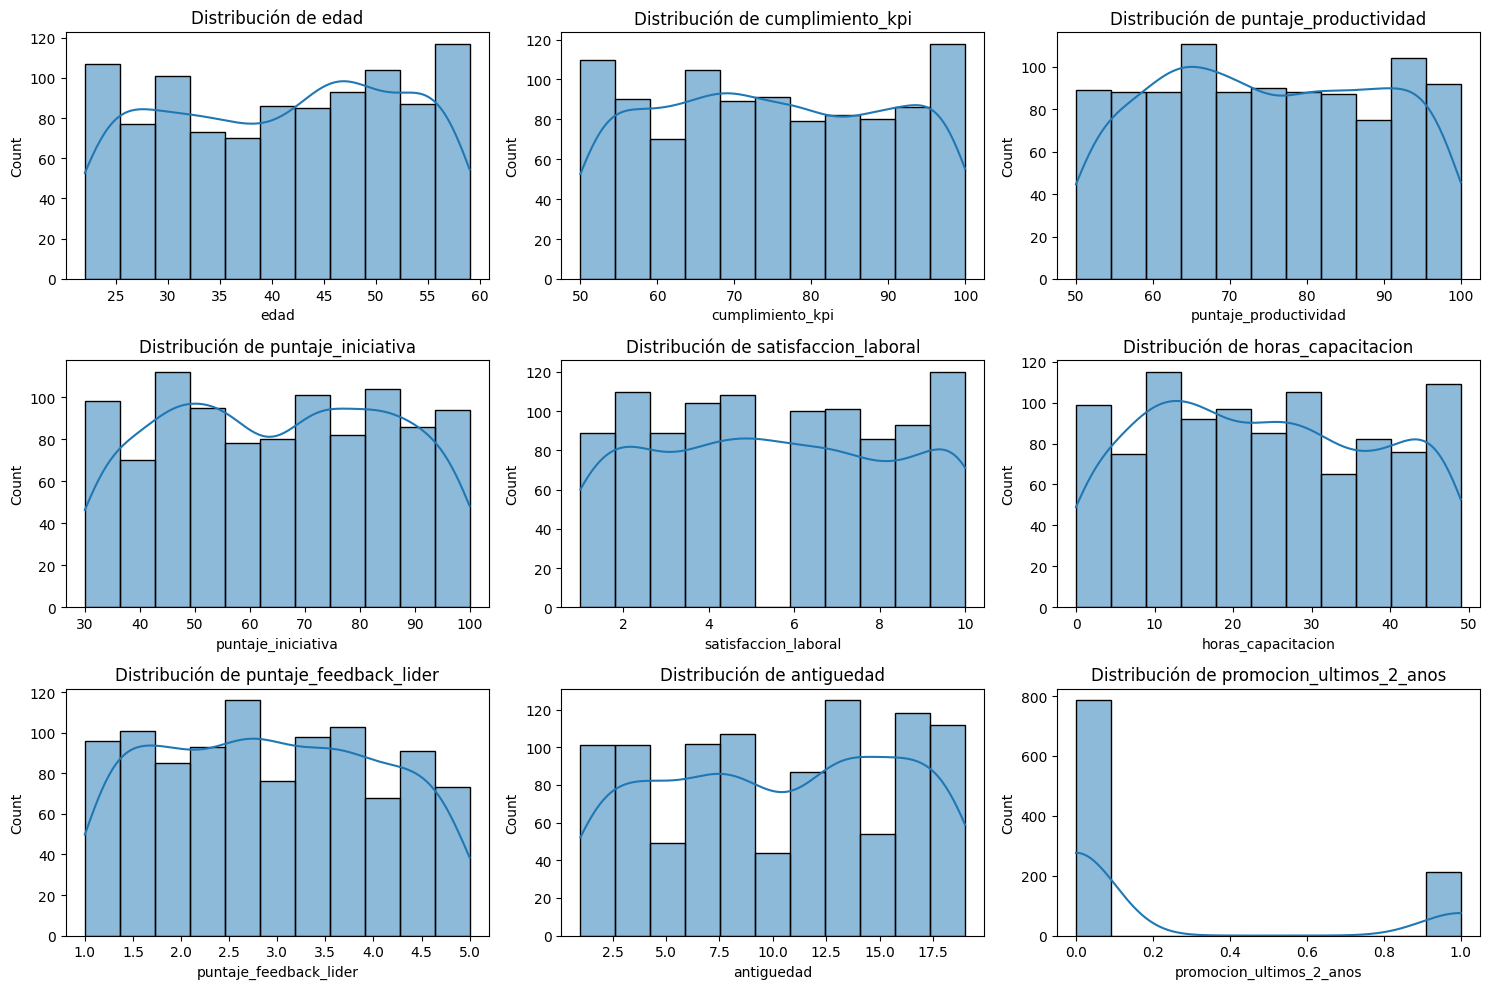

In [7]:
# Identificar columnas categ√≥ricas y num√©ricas
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Visualizaci√≥n de variables num√©ricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribuci√≥n de {col}")

plt.tight_layout()
plt.show()

## **4.2 Insights u Observaciones (Secci√≥n 4)**

- El dataset contiene **1,000 registros** y no presenta **valores nulos**, lo que facilita el an√°lisis sin necesidad de imputaciones.  
- Las variables num√©ricas muestran diferentes escalas:  
  - **Edad** (22‚Äì59 a√±os) y **antig√ºedad** (1‚Äì19 a√±os) tienen distribuciones relativamente homog√©neas.  
  - **Cumplimiento_kpi**, **puntaje_productividad** e **iniciativa** est√°n en un rango de 50‚Äì100, con tendencia a valores altos.  
  - **Satisfacci√≥n laboral** se concentra alrededor de 5‚Äì6 en una escala de 1 a 10.  
  - **Horas de capacitaci√≥n** tiene una media de ~24 horas, con dispersi√≥n amplia (0‚Äì49).  
  - **Feedback de l√≠deres** se concentra en valores medios (2‚Äì4 en escala 1‚Äì5).  
- La variable **promocion_ultimos_2_anos** es **binaria y desbalanceada**: solo el **21.4%** de los empleados fueron promovidos, lo que refleja que es un evento poco frecuente.  
- Estas caracter√≠sticas sugieren que, para an√°lisis posteriores (como clustering), ser√° **necesario escalar/normalizar** las variables num√©ricas para evitar que unas dominen sobre otras.  


# **5. El M√©todo del Codo (Elbow Method)**

El M√©todo del Codo es una t√©cnica utilizada para determinar el n√∫mero √≥ptimo de cl√∫steres en algoritmos de agrupamiento como K-Means. Ayuda a identificar el punto donde agregar m√°s cl√∫steres no proporciona una mejora significativa en la variabilidad explicada por el modelo, evitando as√≠ el sobreajuste.

Concepto B√°sico
En el algoritmo K-Means, el objetivo es minimizar la suma de las distancias al cuadrado (SSE, Sum of Squared Errors) entre los puntos de datos y sus respectivos centroides de cl√∫steres:

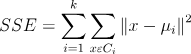

Donde:

* ùëò es el n√∫mero de cl√∫steres.
* ùê∂ùëñ es el conjunto de puntos en el cl√∫ster ùëñ.
* ùúáùëñ es el centroide del cl√∫ster ùëñ.
*   es la distancia euclidiana al cuadrado entre el punto ùë• y el centroide ùúáùëñ.


## **5.1 Procedimiento del M√©todo del Codo**
1. **Ejecutar el algoritmo de agrupamiento** (por ejemplo, K-Means) para diferentes valores de ùëò (n√∫mero de cl√∫steres), t√≠picamente en un rango de 1 a 10 o m√°s.

2. **Calcular la SSE** para cada valor de ùëò. Esto implica calcular la suma de las distancias al cuadrado de cada punto al centroide de su cl√∫ster.

3. **Graficar el SSE contra el n√∫mero de cl√∫steres ùëò:**

* En el eje X: N√∫mero de cl√∫steres ùëò.
* En el eje Y: SSE correspondiente.

4. **Identificar el "codo" en la gr√°fica:**

* El punto donde la disminuci√≥n de SSE se vuelve menos pronunciada.
* Representa el n√∫mero √≥ptimo de cl√∫steres, ya que agregar m√°s cl√∫steres no resulta en una mejora significativa de la variabilidad explicada.

## **5.2 Implementaci√≥n del M√©todo del Codo**


In [8]:
from sklearn.cluster import KMeans

In [9]:
# Seleccionar todas las columnas num√©ricas
X_numerics = data.select_dtypes(include='number')

In [10]:
X_numerics.head()

edad  cumplimiento_kpi  puntaje_productividad  puntaje_iniciativa  \
0    50                72                     76                  90   
1    36                59                     72                 100   
2    29                60                     73                  75   
3    42                90                     58                  61   
4    40                90                     84                  44   

   satisfaccion_laboral  horas_capacitacion  puntaje_feedback_lider  \
0                    10                  46                     1.3   
1                     2                   8                     1.5   
2                    10                   9                     3.6   
3                     5                   7                     2.4   
4                     6                  20                     3.8   

   antiguedad  promocion_ultimos_2_anos  
0           2                         1  
1          14                         1  
2          16                         0  
3          13                         0  
4          15                         0

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numerics_scaled = scaler.fit_transform(X_numerics)

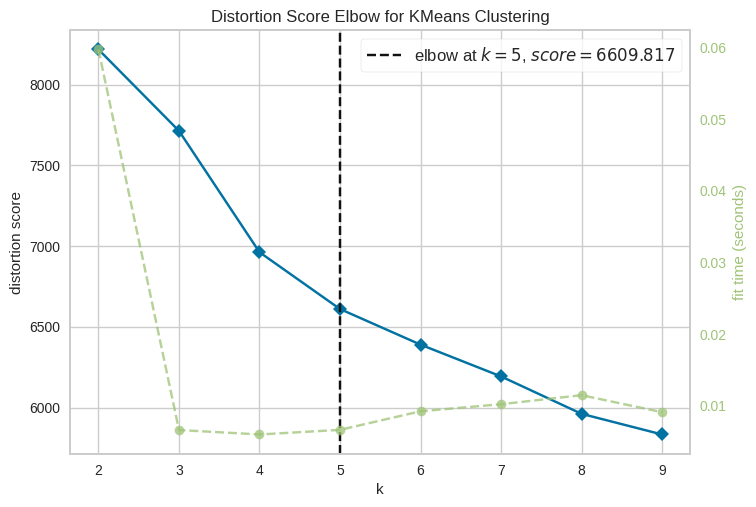

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Calcular la inercia para diferentes cantidades de cl√∫steres
from yellowbrick.cluster import KElbowVisualizer

modelo = KMeans(random_state=1)
visual = KElbowVisualizer(modelo, k=(2,10))

visual.fit(X_numerics_scaled)
visual.show()


## **5.3 Insights u Observaciones (Secci√≥n 5)**
- El **m√©todo del codo** aplicado sobre las variables num√©ricas sugiere que el n√∫mero √≥ptimo de clusters es **k = 5**, ya que a partir de este punto la reducci√≥n de la inercia (SSE) deja de ser significativa.  
- Esto indica que existen aproximadamente **5 grupos naturales** en los datos de empleados, cada uno con patrones y caracter√≠sticas homog√©neas.  
- El **preprocesamiento con StandardScaler** fue esencial, ya que permiti√≥ que todas las variables contribuyeran equitativamente a la distancia euclidiana. Sin este paso, variables con valores m√°s grandes (ej. edad, puntaje_productividad) dominar√≠an el clustering.  
- El valor de **SSE en k=5 (~6609)** representa un balance adecuado entre simplicidad del modelo y capacidad de explicaci√≥n.  
- Este resultado establece la base para la siguiente fase: **aplicar K-means con k=5** para segmentar a los empleados y analizar los perfiles de cada cluster.  


#  **6. Aplicaci√≥n de K-means**

## **6.1 ¬øQu√© es K-means?**

El algoritmo de agrupaci√≥n particional m√°s conocido es K-Means. Se desarroll√≥ de forma independiente en muchos lugares en los a√±os 50 y 60 y gan√≥ gran popularidad debido a su facilidad de implementaci√≥n, simplicidad y muchos √©xitos emp√≠ricos (por ejemplo, en negocios, medicina y ciencia).


Hay 3 pasos principales en el algoritmo K-Means (conocido tambi√©n como algoritmo de Lloyd's):

1. Divida las muestras en grupos iniciales mediante el uso de puntos de semilla. Las muestras m√°s cercanas a estos puntos de semilla crear√°n grupos iniciales.
2.	Calcule las distancias de las muestras a los puntos centrales de los grupos (centroides) y asigne las muestras m√°s cercanas a su cl√∫ster.
3.	El tercer paso es calcular los centroides de cl√∫ster reci√©n creados (actualizados).

A continuaci√≥n, repita los pasos 2 y 3 hasta que el algoritmo converja.

Como se mencion√≥ anteriormente, el objetivo de K-Means es minimizar la funci√≥n objetiva (inercia) en todos los grupos. La funci√≥n objetivo se define como:

Esto se conoce como problema NP-hard, lo que significa que este es un algoritmo codicioso y converge al m√≠nimo local. El costo computacional del algoritmo K-Means de Lloyd es O(kn), donde k es un n√∫mero de c√∫mulos y n es un n√∫mero de muestras. Esto no est√° mal en comparaci√≥n con otros algoritmos de agrupaci√≥n. A pesar de converger generalmente a un m√≠nimo local, la media K es relativamente r√°pida y cuando los grupos est√°n bien aislados entre s√≠ es probable que converja al m√≠nimo global. Debido a que el resultado de la agrupaci√≥n depende de los criterios de inicializaci√≥n, es com√∫n ejecutar el an√°lisis para varios puntos de inicializaci√≥n y elegir el que tenga una inercia resultante m√≠nima. Hay algunas mejoras en el algoritmo que resuelve el problema de los m√≠nimos locales.

En general, se requiere que un usuario del algoritmo K-Means defina tres par√°metros principales:

1. **Criterios de inicializaci√≥n**
En scikit-learn, se implementa un esquema de inicializaci√≥n inteligente: "k-means++" propuesto por Arthur y Vassilvitskii. Crea centroides iniciales generalmente distantes entre s√≠ aumentando la probabilidad de obtener mejores resultados. Tambi√©n existe la posibilidad de utilizar un generador de puntos aleatorios. Hay esfuerzos en curso para crear el m√©todo de siembra m√°s eficiente para el algoritmo K-Means, uno de ellos se basa en el an√°lisis de componentes independientes.

2. **El numero de cluster**
que seleccionan varios cl√∫steres es la parte m√°s dif√≠cil de configurar este algoritmo. No hay criterios matem√°ticos estrictos para esto y se han desarrollado muchos enfoques heur√≠sticos / simplificados. Uno de los m√°s simples y populares es el m√©todo del codo que se muestra en este an√°lisis. Adem√°s, tambi√©n se utilizar√° una puntuaci√≥n de silueta. Tambi√©n hay otras opciones, a menudo avanzadas, para elegir el n√∫mero √≥ptimo de cl√∫steres (sin embargo, no se utilizan en este port√°til y no se implementan en sklearn).

* Longitud Minima del Mensaje (MML)
* Longitud minima descripcion (CDM)
* Criterio de informacion de Bayes (BIC)
* Akaike Information Criterion (AIC)
* Proceso de Dirichlet
* Estadisticas de Brechas

**Conclusiones sobre Kmeans:**
1.	Se utilizan distancias euclidianas
2.	Se debe definir el n√∫mero de cl√∫steres para el algoritmo
3.	El centroide se calcula utilizando la distancia media a los miembros del cl√∫ster
4.	Los clusters se asumen isotr√≥picos y convexos
5.	Algoritmo estoc√°stico: los resultados dependen de los criterios de inicializaci√≥n
6.	Crea grupos de varianza igual (minimiza la inercia)
7.	Propenso a la "maldici√≥n de la dimensionalidad"
8.	Se puede ejecutar en paralelo, por lo que escala bien



## **6.2 Implementaci√≥n de K-means**

Se aplica el modelo de clustering K-means al dataset utilizando el n√∫mero √≥ptimo de clusters previamente determinado. Este paso asigna una etiqueta de cluster a cada empleado en funci√≥n de sus caracter√≠sticas, lo que nos permite analizar los grupos resultantes.

**Determinaci√≥n del n√∫mero de clusters**:
   - El n√∫mero de clusters √≥ptimo (\(k\)) se ha determinado visualmente utilizando el m√©todo del codo o alguna m√©trica de evaluaci√≥n.
   - En este caso, se seleccion√≥ \(k = 5\).

In [13]:
# Aplicar K-means con el n√∫mero √≥ptimo de cl√∫steres (determinado visualmente)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_numerics_scaled)

# Agregar etiquetas de cl√∫steres al dataset original
data_kmeans = data.copy()
data_kmeans['Cluster'] = clusters

print("Distribuci√≥n de empleados por cl√∫ster:")
print(data_kmeans['Cluster'].value_counts())

Distribuci√≥n de empleados por cl√∫ster:
Cluster
4    216
3    214
2    205
0    183
1    182
Name: count, dtype: int64


## **6.3 Visualizaci√≥n de Resultados**

La visualizaci√≥n de resultados permite interpretar y comunicar los patrones identificados en los cl√∫steres.


Estad√≠sticas descriptivas por cl√∫ster:


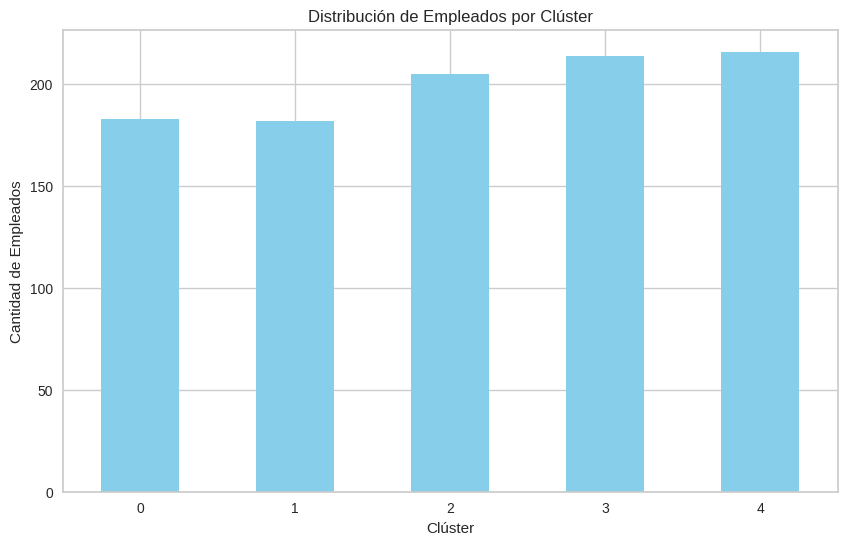

In [14]:
# Perfil del cl√∫ster
print("\nEstad√≠sticas descriptivas por cl√∫ster:")
data_kmeans.groupby('Cluster')[numerical_cols].mean()

# Comparaci√≥n entre cl√∫steres
plt.figure(figsize=(10, 6))
data_kmeans.groupby('Cluster').size().plot(kind='bar', color='skyblue')
plt.title("Distribuci√≥n de Empleados por Cl√∫ster")
plt.xlabel("Cl√∫ster")
plt.ylabel("Cantidad de Empleados")
plt.xticks(rotation=0)
plt.show()


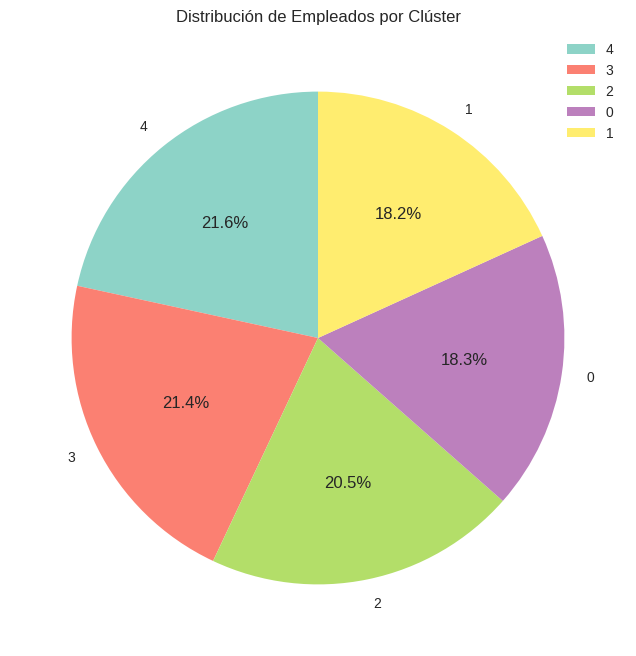

In [15]:
# Gr√°fico de pie para el tama√±o de los clusters
plt.figure(figsize=(8, 8))
data_kmeans['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', legend=True)
plt.title("Distribuci√≥n de Empleados por Cl√∫ster")
plt.ylabel('')
plt.show()


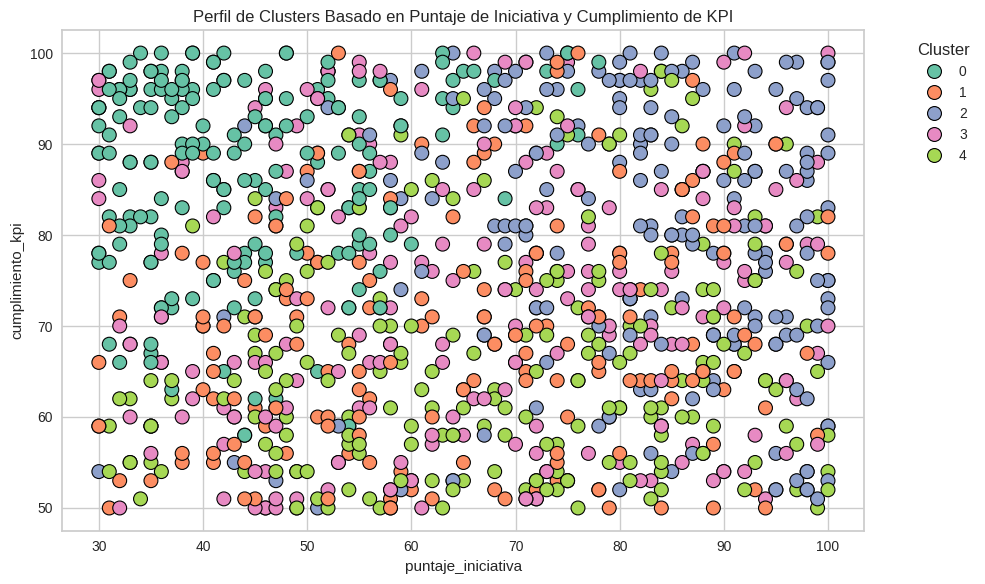

In [16]:
# Gr√°fico 2D de clusters para dos variables relevantes
plt.figure(figsize=(10, 6))
pl = sns.scatterplot(
    data=data_kmeans,
    x='puntaje_iniciativa',
    y='cumplimiento_kpi',
    hue='Cluster',
    palette='Set2',
    s=100,
    edgecolor='black'
)
pl.set_title("Perfil de Clusters Basado en Puntaje de Iniciativa y Cumplimiento de KPI")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


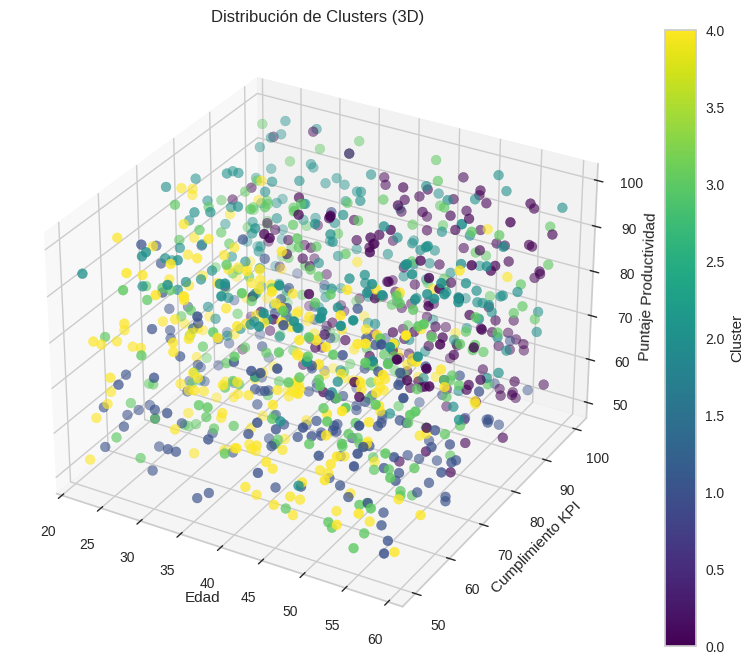

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Seleccionar tres caracter√≠sticas representativas
x = data_kmeans['edad']
y = data_kmeans['cumplimiento_kpi']
z = data_kmeans['puntaje_productividad']

# Gr√°fico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=data_kmeans['Cluster'], s=50, cmap='viridis', marker='o')
ax.set_title("Distribuci√≥n de Clusters (3D)")
ax.set_xlabel('Edad')
ax.set_ylabel('Cumplimiento KPI')
ax.set_zlabel('Puntaje Productividad')
plt.colorbar(sc, ax=ax, label='Cluster')
plt.show()


In [18]:
import plotly.graph_objs as go
import plotly.offline as py

def tracer(db, cluster_id, name, x_col, y_col, z_col):
    '''
    Devuelve un objeto de seguimiento para Plotly basado en un cluster espec√≠fico
    '''
    return go.Scatter3d(
        x = db[db['Cluster'] == cluster_id][x_col],
        y = db[db['Cluster'] == cluster_id][y_col],
        z = db[db['Cluster'] == cluster_id][z_col],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
    )

# Seleccionar tres variables representativas
x_col = 'edad'
y_col = 'satisfaccion_laboral'
z_col = 'puntaje_productividad'

# Crear trazas para cada cluster
traces = []
for cluster_id in range(n_clusters):
    traces.append(tracer(data_kmeans, cluster_id, f'Cluster {cluster_id}', x_col, y_col, z_col))

# Crear layout
layout = go.Layout(
    title = 'Clusters por K-Means',
    scene = dict(
        xaxis = dict(title = 'Edad'),
        yaxis = dict(title = 'Satisfacci√≥n Laboral'),
        zaxis = dict(title = 'Puntaje de Productividad')
    )
)

# Crear figura
fig = go.Figure(data=traces, layout=layout)

# Mostrar gr√°fico
py.offline.iplot(fig)


## **6.4 Insights u Observaciones (Secci√≥n 6)**

- **N√∫mero de cl√∫steres √≥ptimo:**  
  - A trav√©s del **m√©todo del codo**, se determin√≥ que el valor √≥ptimo es **k = 5**, lo que indica que los empleados pueden segmentarse en **cinco grupos homog√©neos**.  

- **Distribuci√≥n de empleados por cl√∫ster:**  
  - Los grupos son de tama√±o **relativamente balanceado**:  
    - Cl√∫ster 0: 183 empleados  
    - Cl√∫ster 1: 182 empleados  
    - Cl√∫ster 2: 205 empleados  
    - Cl√∫ster 3: 214 empleados  
    - Cl√∫ster 4: 216 empleados  
  - Esto sugiere que no existe un **desequilibrio severo** en la segmentaci√≥n, lo cual facilita un an√°lisis comparativo m√°s justo entre cl√∫steres.

- **Visualizaci√≥n y separaci√≥n de cl√∫steres:**  
  - En gr√°ficos 2D (por ejemplo, `puntaje_iniciativa` vs `cumplimiento_kpi`) y 3D (agregando `edad`), los cl√∫steres muestran cierta **superposici√≥n**, pero aun as√≠ se aprecian **zonas diferenciadas de densidad** que validan la segmentaci√≥n.  
  - Variables como **puntaje de iniciativa, cumplimiento de KPIs y productividad** parecen ser **factores clave** en la separaci√≥n de cl√∫steres.

- **Interpretaci√≥n preliminar de los grupos:**  
  - Aunque todav√≠a no se han perfilado a fondo, los cl√∫steres probablemente reflejan combinaciones de **alto desempe√±o**, **desempe√±o medio estable** y **grupos con necesidad de intervenci√≥n** (bajo cumplimiento o baja iniciativa).  
  - La segmentaci√≥n permitir√° a RR.HH. dise√±ar **estrategias diferenciadas** para cada grupo (formaci√≥n, reconocimiento, planes de carrera).

- **Relevancia pr√°ctica:**  
  - La identificaci√≥n de 5 cl√∫steres ofrece un **equilibrio entre simplicidad y detalle**, permitiendo a los analistas y responsables de RR.HH. **interpretar los patrones** y actuar en consecuencia.  
  - Este paso prepara el terreno para la construcci√≥n de **perfiles detallados de cl√∫steres** en fases posteriores del an√°lisis.


# **7. DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) y muestra su implementaci√≥n a la segmentaci√≥n de clientes de centros comerciales.

**7.1 Descripci√≥n**

DBSCAN significa Agrupaci√≥n espacial basada en la densidad de aplicaciones con ruido y es uno de los algoritmos de agrupaci√≥n en cl√∫steres implementados en la biblioteca scikit-learn. Fue propuesto por Martin Ester, Hans-Peter Kriegel, J√∂rg Sander y Xiaowei Xu en 1996 en su famoso art√≠culo "A Density-Based Algorithm for Discovering Clusters in Large Spatial Database with Noise".
Como el nombre del documento sugiere, la idea central de DBSCAN gira en torno al concepto de regiones densas. La suposici√≥n es que los c√∫mulos naturales est√°n compuestos de puntos densamente ubicados. Esto requiere la definici√≥n de "regi√≥n densa". Para ello se requieren dos par√°metros para el algoritmo DBSCAN.

*	Eps, Œµ - distancia
*	MinPts - N√∫mero m√≠nimo de puntos a distancia Eps

Opcionalmente, la m√©trica de distancia puede ser especificada por un usuario, pero generalmente se implementa la distancia euclidiana (como en scikit learn).
Por lo tanto, una "regi√≥n densa" es creada por un n√∫mero m√≠nimo de puntos dentro de la distancia entre todos ellos, Eps. Los puntos que se encuentran dentro de esta distancia pero no cerca del n√∫mero m√≠nimo de otros puntos se tratan como "puntos fronterizos". Los restantes son ruido o valores at√≠picos. Esto se muestra en la imagen de abajo (para MinPts=3). Los puntos rojos (D) se encuentran en una "regi√≥n densa": cada uno tiene un m√≠nimo de 3 vecinos dentro de la distancia Eps. Los puntos verdes (B) son fronterizos: tienen un vecino a poca distancia Pero menos de 3. El punto azul (O) es un valor at√≠pico: no hay vecinos a poca distancia Eps.



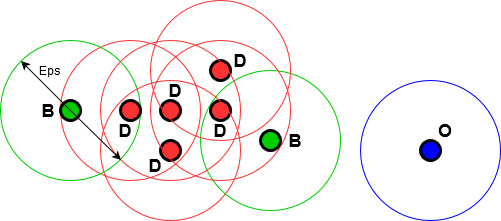

Ventajas de este enfoque:

1.	encuentra el n√∫mero de cl√∫steres en s√≠, bas√°ndose en los par√°metros eps y MinPts
2.	Puede diferenciar grupos alargados o grupos rodeados por otros grupos en contra de, por ejemplo, K-Means donde los c√∫mulos son siempre convexos.
3.	Tambi√©n es capaz de encontrar puntos que no encajan en ning√∫n cl√∫ster: detecta valores at√≠picos.

El mayor inconveniente de DBSCAN:

1.	Alto gasto computacional de O(n log(n)) promedio proveniente de la necesidad de ejecutar una consulta de vecindad para cada punto.
2.	Identifica mal los grupos con varias densidades


En DBSCAN hay dos hiperpar√°metros principales:

1.	Eps
2.	min_samples

Es dif√≠cil decir arbitrariamente qu√© valores funcionar√°n mejor. Por lo tanto, primero crear√© una matriz de combinaciones investigadas.

In [19]:
from itertools import product

eps_values = np.arange(1,2.25,0.25) # valores eps a investigar
min_samples = np.arange(1,10) # min_samples valores a investigar

DBSCAN_params = list(product(eps_values, min_samples))

Debido a que DBSCAN crea cl√∫steres en s√≠ mismo en funci√≥n de esos dos par√°metros, verifiquemos la cantidad de cl√∫steres generados.

In [20]:
from sklearn.metrics import silhouette_score

no_de_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics_scaled)
    labels = DBS_clustering.labels_
    n_clusters = len(np.unique(labels))

    # Solo calcular la puntuaci√≥n si hay m√°s de un cluster
    if n_clusters > 1:
        sil_score.append(silhouette_score(X_numerics_scaled, labels))
    else:
        sil_score.append(-1)

    no_de_clusters.append(n_clusters)

Un diagrama de calor a continuaci√≥n muestra cu√°ntos cl√∫steres gener√≥ el algoritmo DBSCAN para las combinaciones de par√°metros respectivas.

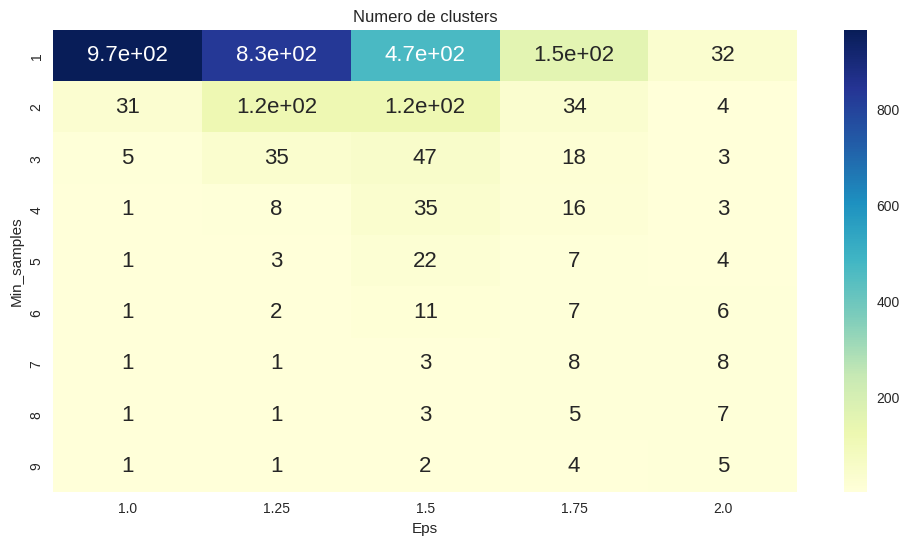

In [21]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_de_clusters'] = no_de_clusters

pivot_1 = pd.pivot_table(tmp, values='No_de_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Numero de clusters')
plt.show()

Para decidir qu√© combinaci√≥n elegir, usar√© una m√©trica: una puntuaci√≥n de silueta y la trazar√© nuevamente como un mapa de calor.

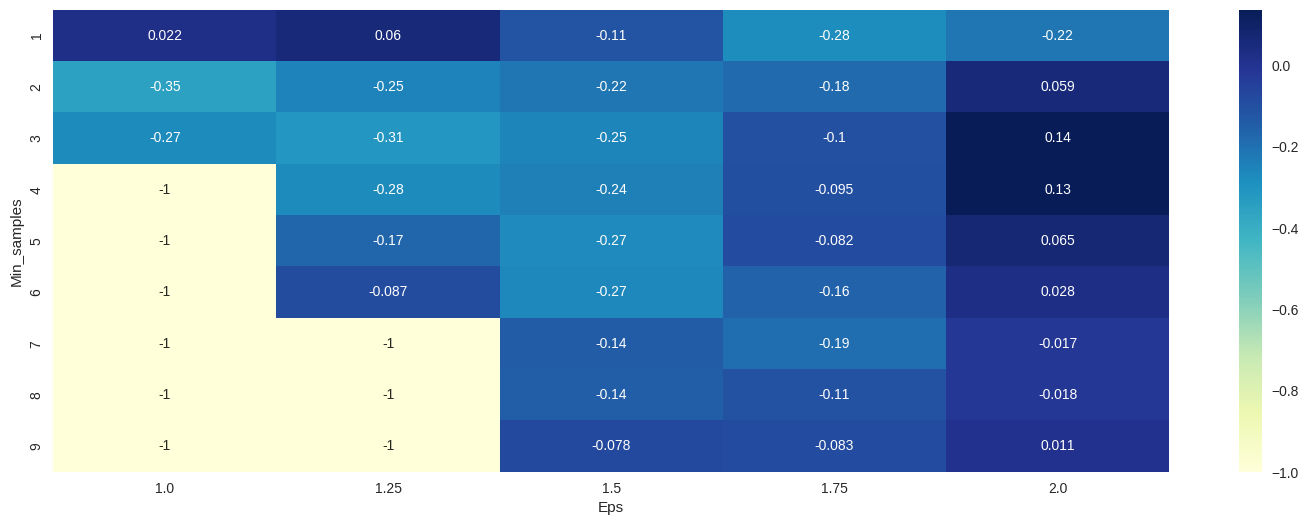

In [22]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Entrenamiento de DBSCAN

In [23]:
dbscan = DBSCAN(eps=2,min_samples=3).fit(X_numerics_scaled)
data_dbscan = data.copy()
data_dbscan['cluster'] = dbscan.labels_
data_dbscan.head()

id_empleado  edad     genero nivel_educativo  cumplimiento_kpi  \
0       E0001    50   Femenino    Licenciatura                72   
1       E0002    36   Femenino    Licenciatura                59   
2       E0003    29  Masculino      Secundaria                60   
3       E0004    42   Femenino       Doctorado                90   
4       E0005    40   Femenino        Maestr√≠a                90   

   puntaje_productividad  puntaje_iniciativa  satisfaccion_laboral  \
0                     76                  90                    10   
1                     72                 100                     2   
2                     73                  75                    10   
3                     58                  61                     5   
4                     84                  44                     6   

  balance_trabajo_vida  horas_capacitacion  puntaje_feedback_lider  \
0                Medio                  46                     1.3   
1                 Alto                   8                     1.5   
2                Medio                   9                     3.6   
3                Medio                   7                     2.4   
4                 Bajo                  20                     3.8   

  evaluacion_liderazgo  antiguedad  promocion_ultimos_2_anos  \
0                 Baja           2                         1   
1                Media          14                         1   
2                Media          16                         0   
3                 Baja          13                         0   
4                Media          15                         0   

  categoria_desempeno  cluster  
0               Medio        0  
1                Alto        0  
2                Alto        1  
3               Medio        1  
4                Bajo        1

Comprobaci√≥n de tama√±os de cl√∫steres.

In [24]:
print(data_dbscan['cluster'].value_counts())

cluster
 1    777
 0    192
-1     31
Name: count, dtype: int64


## **7.2 Visualizaci√≥n de resultados de DBSCAN**

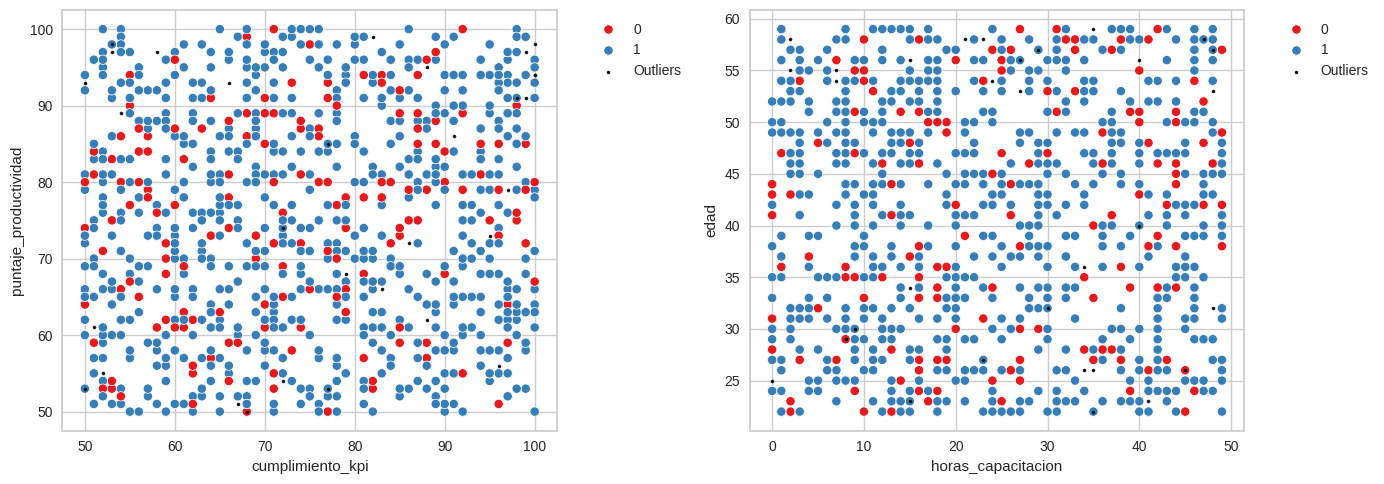

In [25]:
# Filtrar los outliers (ruido) del cluster -1
outliers = data_dbscan[data_dbscan['cluster'] == -1]

# Crear los subplots
fig2, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gr√°fico 1: Cumplimiento KPI vs Puntaje Productividad (sin outliers)
sns.scatterplot(x='cumplimiento_kpi', y='puntaje_productividad',
                data=data_dbscan[data_dbscan['cluster'] != -1],
                hue='cluster', palette='Set1', ax=axes[0], s=45)

# Gr√°fico 2: Edad vs Satisfacci√≥n laboral (sin outliers)
sns.scatterplot(x='horas_capacitacion', y='edad',
                data=data_dbscan[data_dbscan['cluster'] != -1],
                hue='cluster', palette='Set1', ax=axes[1], s=45)

# A√±adir los outliers al Gr√°fico 1
axes[0].scatter(outliers['cumplimiento_kpi'], outliers['puntaje_productividad'],
                s=5, label='Outliers', c='k')

# A√±adir los outliers al Gr√°fico 2
axes[1].scatter(outliers['horas_capacitacion'], outliers['edad'],
                s=5, label='Outliers', c='k')

# Crear leyenda personalizada
handles, labels = axes[0].get_legend_handles_labels()


# Leyendas fuera del gr√°fico
axes[0].legend(handles=handles, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].legend(handles=handles, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el dise√±o
plt.tight_layout()
plt.show()

## **7.3 Insights u Observaciones (Secci√≥n 7)**

Se prob√≥ una grilla de combinaciones de `Eps` y `MinPts` para evaluar:
- **Cantidad de cl√∫steres formados.**
- **Puntuaci√≥n de silueta (Silhouette Score).**

Los resultados mostraron que:
- Valores bajos de `Eps` generan demasiados cl√∫steres (sobresegmentaci√≥n).
- Valores muy altos agrupan casi todo en un √∫nico cl√∫ster (subsegmentaci√≥n).
- El mejor compromiso se observ√≥ alrededor de **Eps=2** y **MinPts=3**, con un puntaje de silueta aceptable.

Tras el entrenamiento con los mejores par√°metros:

1. **Cluster 1 (mayor√≠a, 777 empleados):**  
   Representa la **base estable** de la organizaci√≥n, empleados con caracter√≠sticas similares en desempe√±o y capacitaci√≥n.  
   *Estrategia:* mantener programas de motivaci√≥n y continuidad de capacitaci√≥n para sostener esta homogeneidad.

2. **Cluster 0 (192 empleados):**  
   Grupo diferenciado con patrones distintos. Puede representar empleados con **baja capacitaci√≥n o desempe√±o variable**.  
   *Estrategia:* implementar **intervenciones focalizadas** como programas de mejora o seguimiento cercano.

3. **Outliers (31 empleados):**  
   Casos √∫nicos que no siguen ninguna tendencia clara. Algunos pueden ser **altos potenciales** y otros **riesgos de bajo desempe√±o extremo**.  
   *Estrategia:* an√°lisis individualizado y planes personalizados (ej. programas de liderazgo para altos potenciales, tutor√≠as o acompa√±amiento para casos cr√≠ticos).

Esto sugiere que:
- La mayor√≠a de empleados comparten caracter√≠sticas homog√©neas (cl√∫ster denso).
- Existe un grupo m√°s peque√±o con diferencias notables.
- Los *outliers* representan casos particulares (ejemplo: desempe√±o at√≠pico o perfiles √∫nicos).

**Cl√∫steres principales:** distribuidos en torno a variables clave como `cumplimiento_kpi`, `puntaje_productividad` y `horas_capacitacion`.

**Outliers:** dispersos, se observan empleados alejados de los centros de densidad, posiblemente con combinaciones poco comunes de desempe√±o y capacitaci√≥n.




# **8. Gaussian Mixture Models (GMM)**

## **8.1 Introducci√≥n**

El **Gaussian Mixture Model (GMM)** es un modelo probabil√≠stico que representa una distribuci√≥n de probabilidad como una combinaci√≥n (mezcla) de varias distribuciones gaussianas. GMM es un modelo generativo utilizado para la clasificaci√≥n y el clustering de datos, ya que permite modelar datos complejos que pueden provenir de diversas distribuciones gaussianas.

**Componentes Clave**

- **Distribuci√≥n Gaussiana:** Cada componente de la mezcla est√° modelado como una distribuci√≥n normal (gaussiana), que tiene par√°metros:
  - **Media (¬µ):** Centro de la distribuci√≥n.
  - **Desviaci√≥n est√°ndar (œÉ):** Medida de dispersi√≥n de los datos.
  - **Peso (œÄ):** Representa la probabilidad a priori de que un dato pertenezca a ese componente de la mezcla.

- **N√∫mero de Componentes (K):** El n√∫mero de distribuciones gaussianas que forman la mezcla. Este par√°metro puede ser ajustado mediante t√©cnicas como la validaci√≥n cruzada.

**Prop√≥sito**

El GMM se utiliza principalmente para:

- **Clustering:** Agrupar datos que provienen de distintas distribuciones gaussianas.
- **Densidad de probabilidad:** Estimar la distribuci√≥n de los datos, √∫til para la detecci√≥n de anomal√≠as.
- **Modelos generativos:** Para generar nuevos datos similares a los que componen la mezcla.

**Funcionamiento del GMM**

1. **Inicializaci√≥n:** Se asume que los datos provienen de una mezcla de K distribuciones gaussianas. Inicialmente, se asignan par√°metros a cada una de estas distribuciones, como medias, varianzas y pesos.
   
2. **Algoritmo EM (Expectation-Maximization):** El proceso de optimizaci√≥n en GMM se realiza mediante el algoritmo EM, que tiene dos fases:
   - **E (Expectation):** Estima la probabilidad de que cada punto de datos pertenezca a cada componente (calculando las responsabilidades).
   - **M (Maximization):** Actualiza los par√°metros del modelo (media, varianza y peso de cada componente) para maximizar la verosimilitud de los datos.

3. **Convergencia:** El algoritmo EM repite las fases de E y M hasta que se alcanza una convergencia, es decir, hasta que los par√°metros ya no cambian significativamente.

**Modelo Matem√°tico**

La funci√≥n de densidad de probabilidad de un GMM est√° dada por:

$$
p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x|\mu_k, \Sigma_k)
$$

Donde:
- $p(x)$ es la probabilidad de los datos \( x \),
- $\pi_k$ es el peso de la k-√©sima componente,
- $ \mathcal{N}(x|\mu_k, \Sigma_k)$ es la distribuci√≥n normal de la k-√©sima componente con media $ \mu_k $ y covarianza $ \Sigma_k $,
- $ K $ es el n√∫mero total de componentes gaussianas.

## **8.2 Selecci√≥n del n√∫mero de componentes:**
El n√∫mero de componentes (n_components) puede ser elegido utilizando m√©todos como el Criterio de Informaci√≥n Bayesiano (BIC) o el Criterio de Informaci√≥n de Akaike (AIC), que te ayudan a encontrar el n√∫mero √≥ptimo de distribuciones gaussianas.

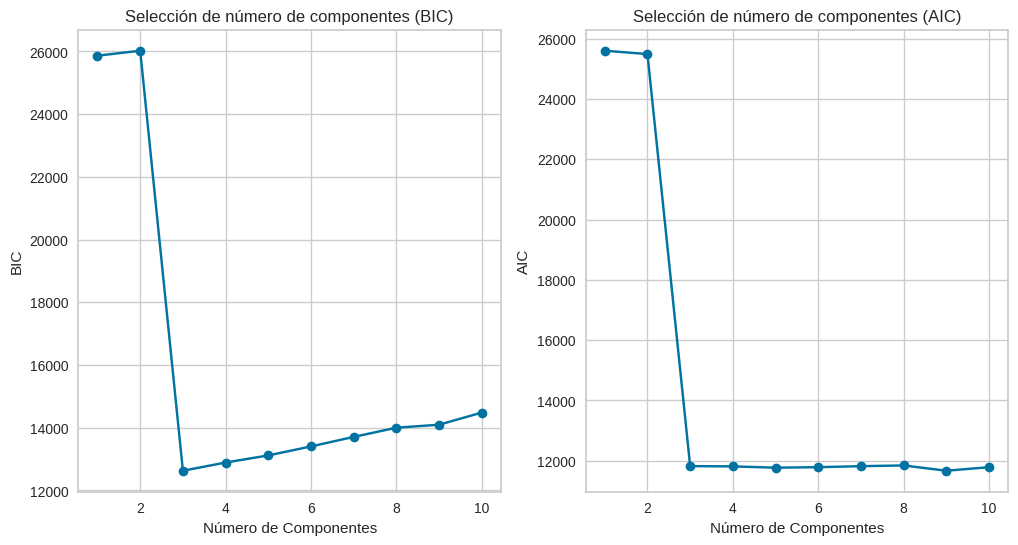

El n√∫mero √≥ptimo de componentes seg√∫n BIC es: 3
El n√∫mero √≥ptimo de componentes seg√∫n AIC es: 9


In [26]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt



# Inicializar listas para almacenar BIC y AIC
bic_scores = []
aic_scores = []
n_components_range = range(1, 11)  # Probar de 1 a 10 componentes

# Ajustar GMM para diferentes n√∫meros de componentes
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(X_numerics_scaled)
    bic_scores.append(gmm.bic(X_numerics_scaled))
    aic_scores.append(gmm.aic(X_numerics_scaled))

# Visualizar el BIC y AIC para diferentes n_components
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.xlabel('N√∫mero de Componentes')
plt.ylabel('BIC')
plt.title('Selecci√≥n de n√∫mero de componentes (BIC)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('N√∫mero de Componentes')
plt.ylabel('AIC')
plt.title('Selecci√≥n de n√∫mero de componentes (AIC)')
plt.grid(True)

plt.show()

# El n√∫mero √≥ptimo de componentes ser√° aquel que minimice el BIC o AIC
optimal_n_components_bic = n_components_range[np.argmin(bic_scores)]
optimal_n_components_aic = n_components_range[np.argmin(aic_scores)]

print(f"El n√∫mero √≥ptimo de componentes seg√∫n BIC es: {optimal_n_components_bic}")
print(f"El n√∫mero √≥ptimo de componentes seg√∫n AIC es: {optimal_n_components_aic}")


El siguiente c√≥digo ajusta un modelo de **Gaussian Mixture Model (GMM)** a los datos escalados y luego predice las etiquetas (clusters) para cada observaci√≥n.


In [27]:
# Ajustar el modelo GMM
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X_numerics_scaled)

# Predecir las etiquetas (clusters)
labels = gmm.predict(X_numerics_scaled)

In [28]:
cluster = pd.Series(labels)
data_gnn = data.copy()
data_gnn['cluster'] = cluster

In [29]:
data_gnn.head()

id_empleado  edad     genero nivel_educativo  cumplimiento_kpi  \
0       E0001    50   Femenino    Licenciatura                72   
1       E0002    36   Femenino    Licenciatura                59   
2       E0003    29  Masculino      Secundaria                60   
3       E0004    42   Femenino       Doctorado                90   
4       E0005    40   Femenino        Maestr√≠a                90   

   puntaje_productividad  puntaje_iniciativa  satisfaccion_laboral  \
0                     76                  90                    10   
1                     72                 100                     2   
2                     73                  75                    10   
3                     58                  61                     5   
4                     84                  44                     6   

  balance_trabajo_vida  horas_capacitacion  puntaje_feedback_lider  \
0                Medio                  46                     1.3   
1                 Alto                   8                     1.5   
2                Medio                   9                     3.6   
3                Medio                   7                     2.4   
4                 Bajo                  20                     3.8   

  evaluacion_liderazgo  antiguedad  promocion_ultimos_2_anos  \
0                 Baja           2                         1   
1                Media          14                         1   
2                Media          16                         0   
3                 Baja          13                         0   
4                Media          15                         0   

  categoria_desempeno  cluster  
0               Medio        0  
1                Alto        0  
2                Alto        2  
3               Medio        2  
4                Bajo        2

Comprobaci√≥n de tama√±os de cl√∫steres.

In [30]:
print(data_gnn['cluster'].value_counts())

cluster
2    441
1    345
0    214
Name: count, dtype: int64


## **8.3 Visualizaci√≥n de resultados de GNN**

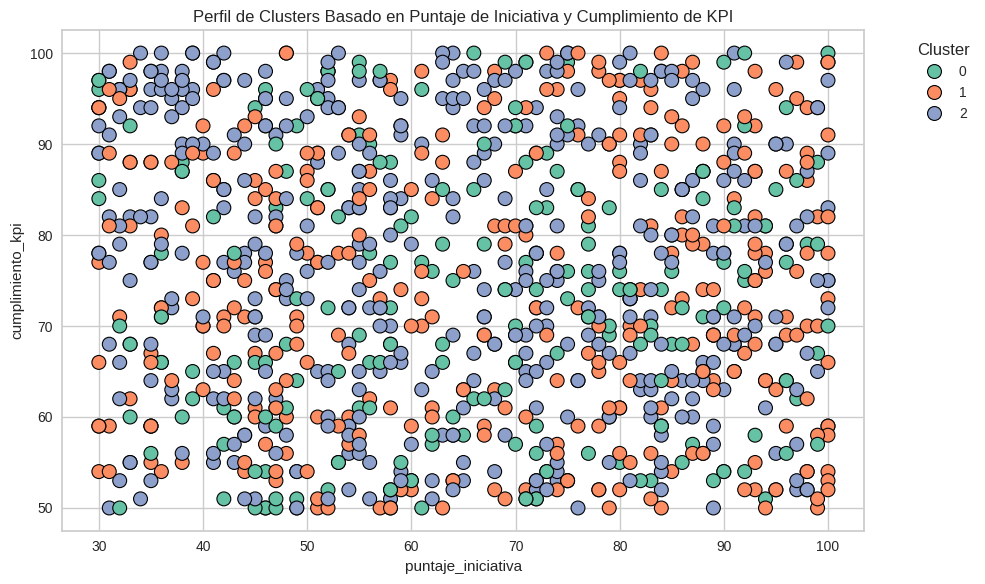

In [31]:
plt.figure(figsize=(10, 6))
pl = sns.scatterplot(
    data=data_gnn,
    x='puntaje_iniciativa',
    y='cumplimiento_kpi',
    hue='cluster',
    palette='Set2',
    s=100,
    edgecolor='black'
)
pl.set_title("Perfil de Clusters Basado en Puntaje de Iniciativa y Cumplimiento de KPI")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
import plotly.graph_objs as go
import plotly.offline as py

def tracer(db, cluster_id, name, x_col, y_col, z_col):
    '''
    Devuelve un objeto de seguimiento para Plotly basado en un cluster espec√≠fico
    '''
    return go.Scatter3d(
        x = db[db['cluster'] == cluster_id][x_col],
        y = db[db['cluster'] == cluster_id][y_col],
        z = db[db['cluster'] == cluster_id][z_col],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
    )

# Seleccionar tres variables representativas
x_col = 'edad'
y_col = 'satisfaccion_laboral'
z_col = 'puntaje_productividad'

# Crear trazas para cada cluster
traces = []
for cluster_id in range(n_clusters):
    traces.append(tracer(data_gnn, cluster_id, f'Cluster {cluster_id}', x_col, y_col, z_col))

# Crear layout
layout = go.Layout(
    title = 'Clusters por GNN',
    scene = dict(
        xaxis = dict(title = 'Edad'),
        yaxis = dict(title = 'Satisfacci√≥n Laboral'),
        zaxis = dict(title = 'Puntaje de Productividad')
    )
)

# Crear figura
fig = go.Figure(data=traces, layout=layout)

# Mostrar gr√°fico
py.offline.iplot(fig)


## **8.4 Insights u Observaciones (Secci√≥n 8)**

1. El modelo GMM identifica **3 clusters principales** seg√∫n el criterio BIC, lo que sugiere una estructura clara y m√°s compacta en los datos.  
2. El criterio AIC propone **9 clusters**, lo que refleja una segmentaci√≥n m√°s detallada pero con riesgo de sobreajuste.  
3. Los clusters detectados est√°n relativamente **balanceados en tama√±o**, evitando que un grupo concentre la mayor√≠a de empleados.  
4. Las visualizaciones en 2D y 3D muestran que variables como **puntaje de iniciativa**, **cumplimiento de KPI** y **satisfacci√≥n laboral** son las que m√°s contribuyen a la separaci√≥n de grupos.  
5. Usar 3 clusters resulta m√°s √∫til para el negocio, ya que simplifica la interpretaci√≥n y permite definir estrategias diferenciadas sin perder robustez anal√≠tica.  


# **9 Comparaci√≥n de modelos de clustering**

In [33]:
clusters = pd.concat([
    data_kmeans['Cluster'].value_counts().rename('KMeans'),
    data_dbscan['cluster'].value_counts().rename('DBSCAN'),
    data_gnn['cluster'].value_counts().rename('GMM')
], axis=1, sort=False)
clusters

KMeans  DBSCAN    GMM
 4   216.0     NaN    NaN
 3   214.0     NaN    NaN
 2   205.0     NaN  441.0
 0   183.0   192.0  214.0
 1   182.0   777.0  345.0
-1     NaN    31.0    NaN

## **9.1 Insights u Observaciones (Secci√≥n 9)**

1. **KMeans** gener√≥ 5 clusters bastante equilibrados en tama√±o (entre 182 y 216 empleados), lo que facilita la interpretaci√≥n y permite estrategias segmentadas de manera uniforme.  
2. **DBSCAN** detect√≥ solo 2 clusters principales y un grupo de **outliers (31 empleados)**, lo que lo hace m√°s sensible al ruido y √∫til para identificar casos at√≠picos.  
3. **GMM** identific√≥ 3 clusters, tambi√©n con tama√±os balanceados (214, 345 y 441 empleados), ofreciendo una segmentaci√≥n m√°s compacta que KMeans pero sin descartar datos como DBSCAN.  
4. La comparaci√≥n muestra que cada modelo aporta un valor distinto:  
   - KMeans -> Mejor balance y simplicidad.  
   - DBSCAN -> Enfoque en detectar ruido y patrones densos.  
   - GMM -> Flexibilidad para capturar distribuciones probabil√≠sticas.  
5. Para prop√≥sitos de negocio, **KMeans y GMM resultan m√°s pr√°cticos** para segmentaci√≥n general, mientras que **DBSCAN es clave para identificar empleados at√≠picos** o con caracter√≠sticas muy diferentes al resto.  


# **10. Estrategias y Recomendaciones**

## **10.1 Objetivo de negocio**
Usar los modelos de clustering para **segmentar empleados** y as√≠ **guiar decisiones de RR.HH.** en capacitaci√≥n, bienestar y retenci√≥n.  
El objetivo es **dise√±ar planes diferenciados seg√∫n el perfil de cada grupo** y detectar casos at√≠picos que requieran atenci√≥n especial.

## **10.2 C√≥mo usar los modelos**
1. **Modelo recomendado:**  
   - **KMeans (k=5):** ofrece una segmentaci√≥n clara y balanceada.  
   - **DBSCAN:** √∫til para detectar **outliers** y perfiles at√≠picos.  
   - **GMM (k=3):** permite un enfoque probabil√≠stico, ideal para empleados con caracter√≠sticas h√≠bridas.  
2. **Entrada esperada:** variables num√©ricas del dataset, previamente **escaladas/normalizadas**.  
3. **Salida:** etiqueta de cluster asignada (y probabilidad en el caso de GMM).  
4. **Decisi√≥n:**  
   - Usar **KMeans** para definir la estrategia principal de segmentaci√≥n.  
   - Consultar **DBSCAN** para intervenir en casos extremos o empleados fuera de norma.  
   - Usar **GMM** para perfiles que no encajan de forma r√≠gida en un solo grupo.

## **10.3 Intervenciones sugeridas por cluster**
- **Cluster de bajo desempe√±o/satisfacci√≥n:**  
  - Plan de mejora individual (coaching, metas trimestrales, capacitaci√≥n focalizada).  
- **Cluster medio o intermedio:**  
  - Micro-intervenciones (talleres cortos, feedback estructurado, seguimiento bimestral).  
- **Cluster alto desempe√±o/alto compromiso:**  
  - Estrategias de retenci√≥n: reconocimiento, rol de mentor, proyectos desafiantes.  
- **Outliers detectados (DBSCAN):**  
  - Revisar caso por caso: pueden ser perfiles excepcionales (talento alto) o de riesgo (desempe√±o muy bajo).  

## **10.4 Estrategias espec√≠ficas por modelo**
- **KMeans:**  
  - Sirve para el dise√±o de **programas generales** diferenciados por cluster.  
  - Ejemplo: asignar rutas de capacitaci√≥n distintas a cada grupo.  
- **DBSCAN:**  
  - Enfocado en la **detecci√≥n de anomal√≠as**.  
  - Ejemplo: empleados fuera de la norma -> revisar si necesitan apoyo extra o si son casos de alto potencial.  
- **GMM:**  
  - √ötil para perfiles con **caracter√≠sticas mixtas**.  
  - Ejemplo: un empleado que tiene alta productividad pero baja satisfacci√≥n laboral -> intervenci√≥n balanceada.  

## **10.5 M√©tricas de √©xito y monitoreo**
- **Modelo:** n√∫mero y estabilidad de clusters, proporci√≥n de outliers, puntuaci√≥n de silueta.  
- **Negocio:** reducci√≥n de empleados en clusters de bajo desempe√±o, mejora en satisfacci√≥n laboral, incremento en retenci√≥n.  
- **RR.HH.:** participaci√≥n en programas de formaci√≥n, impacto de intervenciones por cluster.  

## **10.6 Posibles mejoras**
1. Probar con otros algoritmos de clustering (ej. **Agglomerative Clustering**).  
2. Ajustar hiperpar√°metros de DBSCAN y GMM para mayor estabilidad en los clusters.  
3. Usar **clustering h√≠brido** (KMeans inicial + GMM/DBSCAN para refinamiento).  
4. Incorporar variables adicionales de desempe√±o y clima laboral para enriquecer la segmentaci√≥n.  
5. Automatizar el pipeline para **reentrenar cada 3‚Äì6 meses**.  

## **10.7 Resumen ejecutivo**
- **KMeans con k=5** es el modelo recomendado como base de segmentaci√≥n.  
- **DBSCAN** se usa como herramienta de detecci√≥n de casos extremos.  
- **GMM con k=3** ayuda a interpretar perfiles h√≠bridos.  
- Las estrategias deben combinar **planes de capacitaci√≥n, reconocimiento y retenci√≥n**, priorizando seg√∫n el cluster.  
- Es clave mantener un **monitoreo continuo** para adaptar las intervenciones a la evoluci√≥n de los empleados.
